**Filtering the dataset with relevant columns to decrease the size on mem**

In [7]:
# Ensure the necessary properties are in the DataFrame
materialsdf = df.filter([
    'composition', "elements", "magnetic_ordering", 'formula_pretty', 'formula_anonymous', 'symmetry', 'structure',
    'volume', 'is_stable', 'energy_above_hull', 'decomposes_to', 'band_gap', 'cbm',
    'vbm', 'is_gap_direct', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy',
    'homogeneous_poisson', 'uncorrected_energy_per_atom', 'energy_per_atom',
    'formation_energy_per_atom', 'possible_species', 'is_metal', 'magnetic_ordering',
    'total_magnetization', 'elements', 'composition', 'formula_pretty', 'formula_anonymous', 
    'is_stable', 'energy_above_hull', 'decomposes_to', 
    'band_gap', 'cbm', 'vbm', 'is_gap_direct', 
    'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 
    'weighted_surface_energy', 'weighted_work_function', 
    'symmetry', 'structure', 'material_id', 'chemsys'
])

# Display the filtered DataFrame
materialsdf.shape
materialsdf.head()


,composition,elements,formula_pretty,formula_anonymous,symmetry,structure,volume,is_stable,energy_above_hull,decomposes_to,...,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,possible_species,is_metal,total_magnetization,weighted_surface_energy,weighted_work_function,material_id,chemsys
0,{'Ac': 1.0},[Ac],Ac,A,"{'crystal_system': 'Cubic', 'symbol': 'Fm-3m',...",[[0. 0. 0.] Ac],46.205987,False,0.021639,"[{'material_id': 'mp-862690', 'formula': 'Ac4'...",...,-68.615840,-68.615840,0.021639,[Ac0+],True,0.000059,0.619605,2.827335,mp-10018,Ac
1,{'Ac': 3.0},[Ac],Ac,A,"{'crystal_system': 'Trigonal', 'symbol': 'P3_1...",[[2.62192380e+00 6.50208153e-18 0.00000000e+00...,136.026686,False,0.015586,"[{'material_id': 'mp-862690', 'formula': 'Ac4'...",...,-4.105589,-68.621894,0.015586,[Ac0+],True,0.022801,NaN,NaN,mp-1183057,Ac
2,{'Ac': 3.0},[Ac],Ac,A,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m...","[[0. 0. 0.] Ac, [ 9.37069546e-17 -2.33645283e+...",138.841056,False,0.011822,"[{'material_id': 'mp-862690', 'formula': 'Ac4'...",...,-68.625658,-68.625658,0.011822,[Ac0+],True,0.000971,NaN,NaN,mp-1183069,Ac
3,{'Ac': 4.0},[Ac],Ac,A,"{'crystal_system': 'Hexagonal', 'symbol': 'P6_...","[[0. 0. 0.] Ac, [-3.50000702e-07 2.33598723e+...",184.545401,True,0.000000,None,...,-68.637479,-68.637479,0.000000,[Ac0+],True,0.000107,NaN,NaN,mp-862690,Ac
4,{'Ag': 2.0},[Ag],Ag,A,"{'crystal_system': 'Hexagonal', 'symbol': 'P6_...",[[-2.14448300e-06 1.68719111e+00 1.17541545e...,34.772131,False,0.007669,"[{'material_id': 'mp-8566', 'formula': 'Ag4', ...",...,-21.348208,-21.348208,0.007669,[Ag0+],True,0.000001,NaN,NaN,mp-10597,Ag


In [8]:
print(materialsdf.formula_pretty.value_counts())

formula_pretty
C     63
Si    43
S     32
O2    27
Hg    26
      ..
Tc     3
Th     2
Ru     2
Ar     2
Ne     1
Name: count, Length: 89, dtype: int64


In [9]:
print(df['composition'].head())
print(df['composition'].dtype)

0    {'Ac': 1.0}
1    {'Ac': 3.0}
2    {'Ac': 3.0}
3    {'Ac': 4.0}
4    {'Ag': 2.0}
Name: composition, dtype: object
object


#### Bandgap Distribution

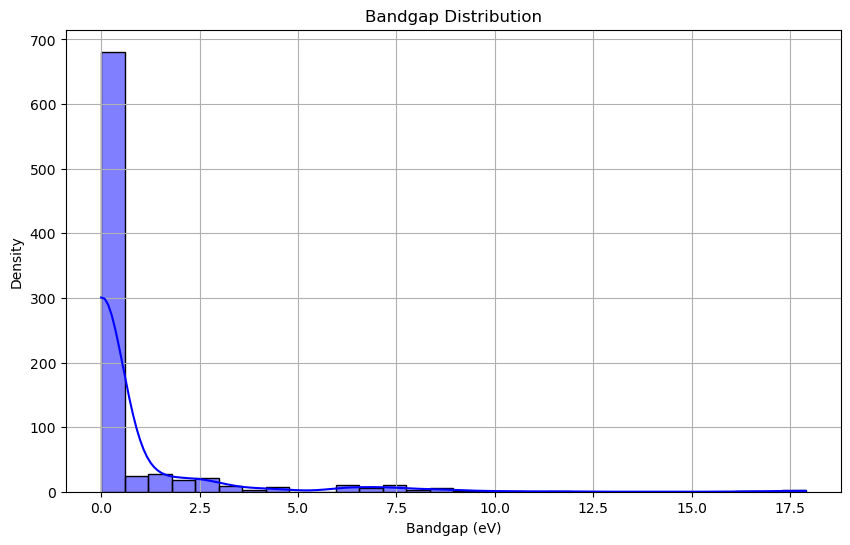

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming `materialsdf` is already a DataFrame)
# Example data columns: 'band_gap', 'is_stable', 'energy_above_hull'

# 1. Bandgap Distribution
plt.figure(figsize=(10, 6))
sns.histplot(materialsdf['band_gap'], kde=True, bins=30, color='blue')
plt.title('Bandgap Distribution')
plt.xlabel('Bandgap (eV)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#### Stability vs. Bandgap

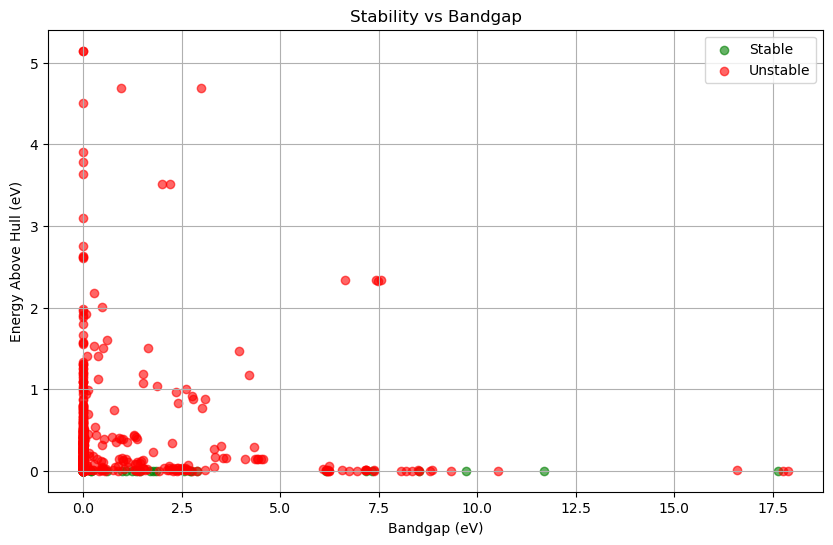

In [11]:
# 2. Stability vs. Bandgap
plt.figure(figsize=(10, 6))
stable_materials = materialsdf[materialsdf['is_stable'] == True]
unstable_materials = materialsdf[materialsdf['is_stable'] == False]

# Plot stable and unstable materials
plt.scatter(stable_materials['band_gap'], stable_materials['energy_above_hull'], 
            color='green', label='Stable', alpha=0.6)
plt.scatter(unstable_materials['band_gap'], unstable_materials['energy_above_hull'], 
            color='red', label='Unstable', alpha=0.6)

plt.title('Stability vs Bandgap')
plt.xlabel('Bandgap (eV)')
plt.ylabel('Energy Above Hull (eV)')
plt.legend()
plt.grid(True)
plt.show()

#### Density Plots: Overlay Stability on Bandgap Distributions
Plot showing the density of stability overlaid on the bandgap distribution.

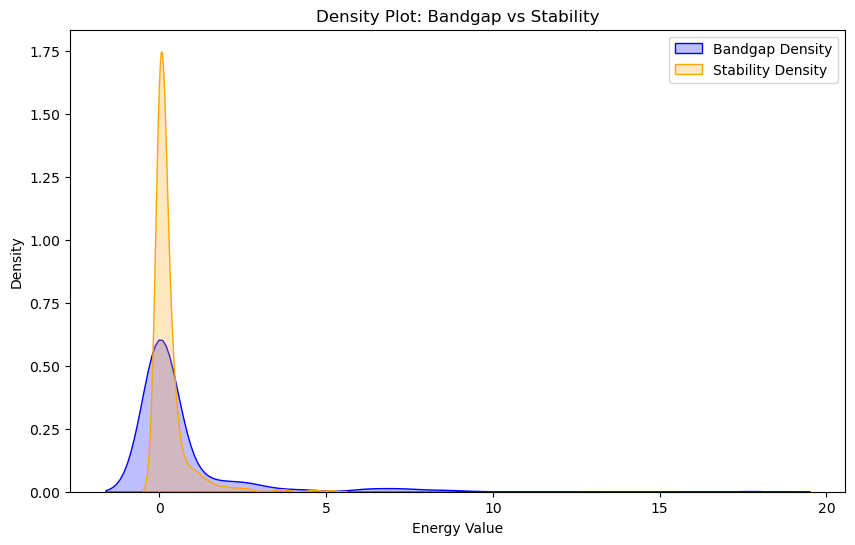

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density for bandgap
plt.figure(figsize=(10, 6))
sns.kdeplot(data=materialsdf, x='band_gap', label='Bandgap Density', color='blue', fill=True)

# Plot density for stability (energy above hull)
sns.kdeplot(data=materialsdf, x='energy_above_hull', label='Stability Density', color='orange', fill=True)

plt.title('Density Plot: Bandgap vs Stability')
plt.xlabel('Energy Value')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Clustering Analysis
Perform clustering on bandgap and stability metrics.

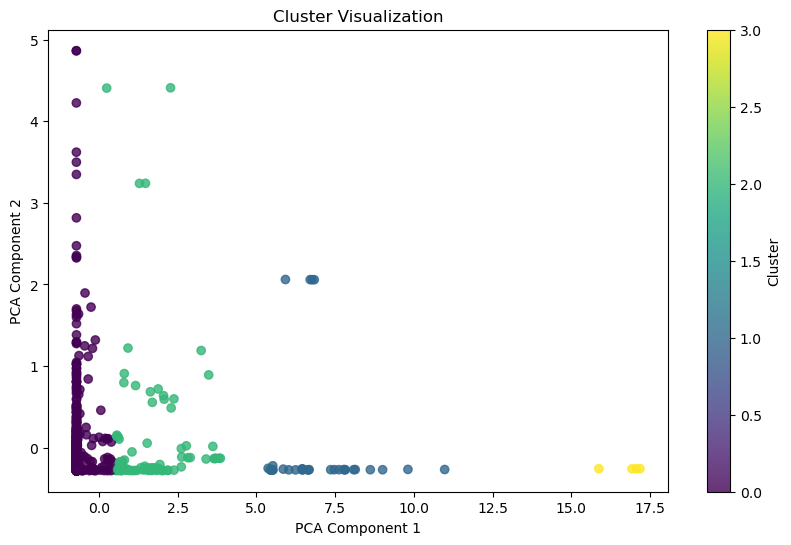

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
clustering_features = materialsdf[['band_gap', 'energy_above_hull']].fillna(0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
materialsdf['cluster'] = kmeans.fit_predict(clustering_features)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_features[:, 0], reduced_features[:, 1], 
    c=materialsdf['cluster'], cmap='viridis', alpha=0.8
)
plt.colorbar(scatter, label='Cluster')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### Outlier Analysis
Identify and visualize materials with unusual combinations of bandgap and stability.

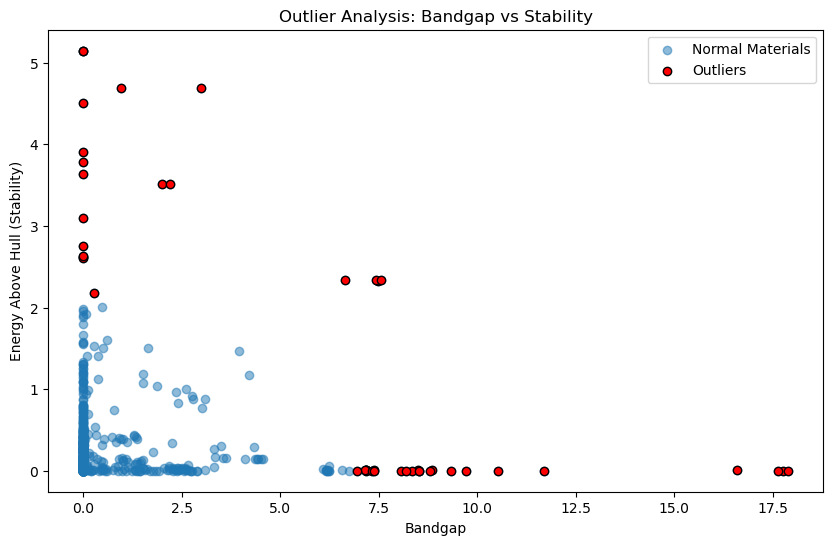

Outliers Detected:
    formula_pretty  band_gap  energy_above_hull
19              Ar    8.5132           0.000000
20              Ar    8.4898           0.003445
89               C    0.0000           2.618194
95               C    0.0000           2.607662
97               C    0.0000           2.636821
147              C    0.0000           2.756673
279             H2    7.3865           0.003538
281             H2    7.4848           2.330814
282             H2    8.0699           0.002440
283             H2   10.5229           0.002676
284             H2    6.6359           2.334901
285             H2    9.3289           0.000643
286             H2    7.4222           2.332232
287             H2    8.8499           0.002951
288             H2    7.5517           2.330944
289             H2    9.7197           0.000000
290             H2    8.3343           0.002279
291             H2    8.1865           0.002715
293             H2    8.5338           0.001754
294             H2   

In [14]:
from scipy.stats import zscore

# Compute z-scores for outlier detection
materialsdf['bandgap_zscore'] = zscore(materialsdf['band_gap'].fillna(0))
materialsdf['stability_zscore'] = zscore(materialsdf['energy_above_hull'].fillna(0))

# Define outliers as materials with high z-scores
outliers = materialsdf[
    (abs(materialsdf['bandgap_zscore']) > 3) | 
    (abs(materialsdf['stability_zscore']) > 3)
]

# Highlight outliers in the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(materialsdf['band_gap'], materialsdf['energy_above_hull'], alpha=0.5, label='Normal Materials')
plt.scatter(outliers['band_gap'], outliers['energy_above_hull'], color='red', label='Outliers', edgecolor='k')
plt.title('Outlier Analysis: Bandgap vs Stability')
plt.xlabel('Bandgap')
plt.ylabel('Energy Above Hull (Stability)')
plt.legend()
plt.show()

# Print outlier details
print("Outliers Detected:")
print(outliers[['formula_pretty', 'band_gap', 'energy_above_hull']])


#### Elemental Contributions to Bandgap

/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


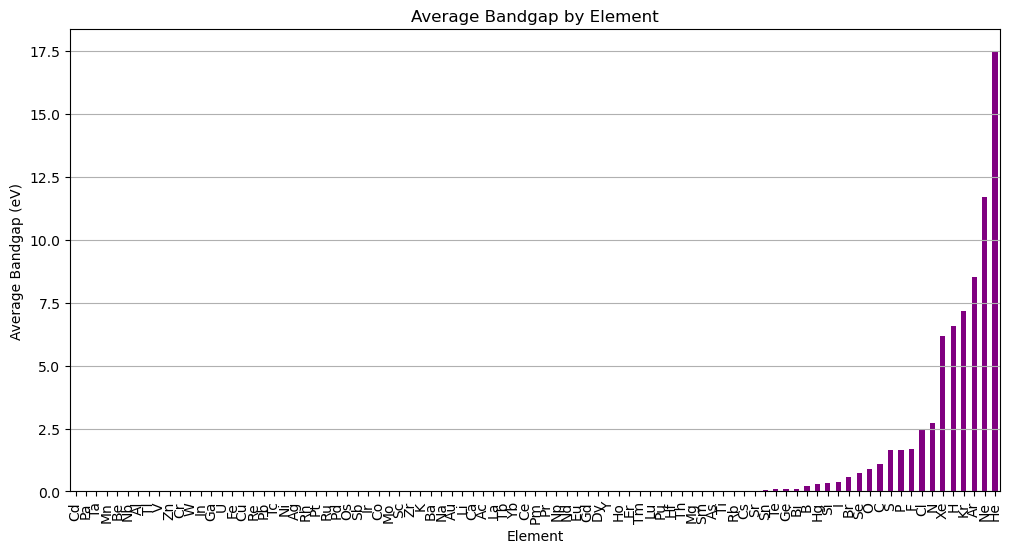

In [15]:
# Extract unique elements and calculate average bandgap per element
from pymatgen.core import Composition

def extract_elements(row):
    try:
        return list(Composition(row).keys())
    except:
        return []

materialsdf['elements'] = materialsdf['composition'].apply(extract_elements)

# Explode the elements column and group by element
element_bandgap = materialsdf[['elements', 'band_gap']].explode('elements').groupby('elements')['band_gap'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
element_bandgap.sort_values().plot(kind='bar', color='purple')
plt.title('Average Bandgap by Element')
plt.xlabel('Element')
plt.ylabel('Average Bandgap (eV)')
plt.grid(axis='y')
plt.show()


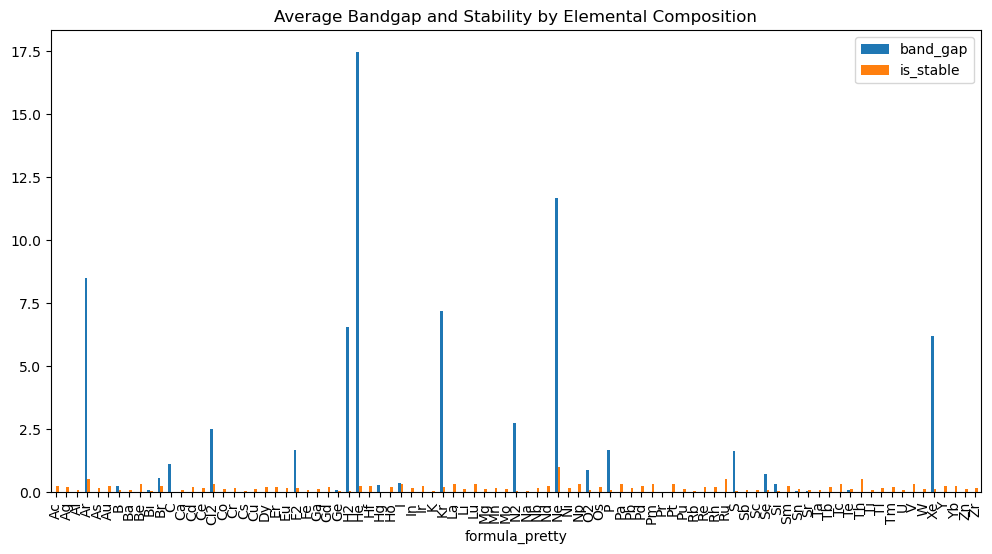

In [16]:
groupby_element = materialsdf.groupby('formula_pretty')[['band_gap','is_stable']].mean()
groupby_element.plot(kind='bar', figsize=(12, 6))
plt.title("Average Bandgap and Stability by Elemental Composition")
plt.show()

#### Element Frequency Analysis
Analyze the frequency of elements grouped by stability levels or bandgap ranges.

/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/2680363742.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  element_frequency = exploded_elements.groupby(['bandgap_range', 'elements']).size().reset_index(name='count')
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  

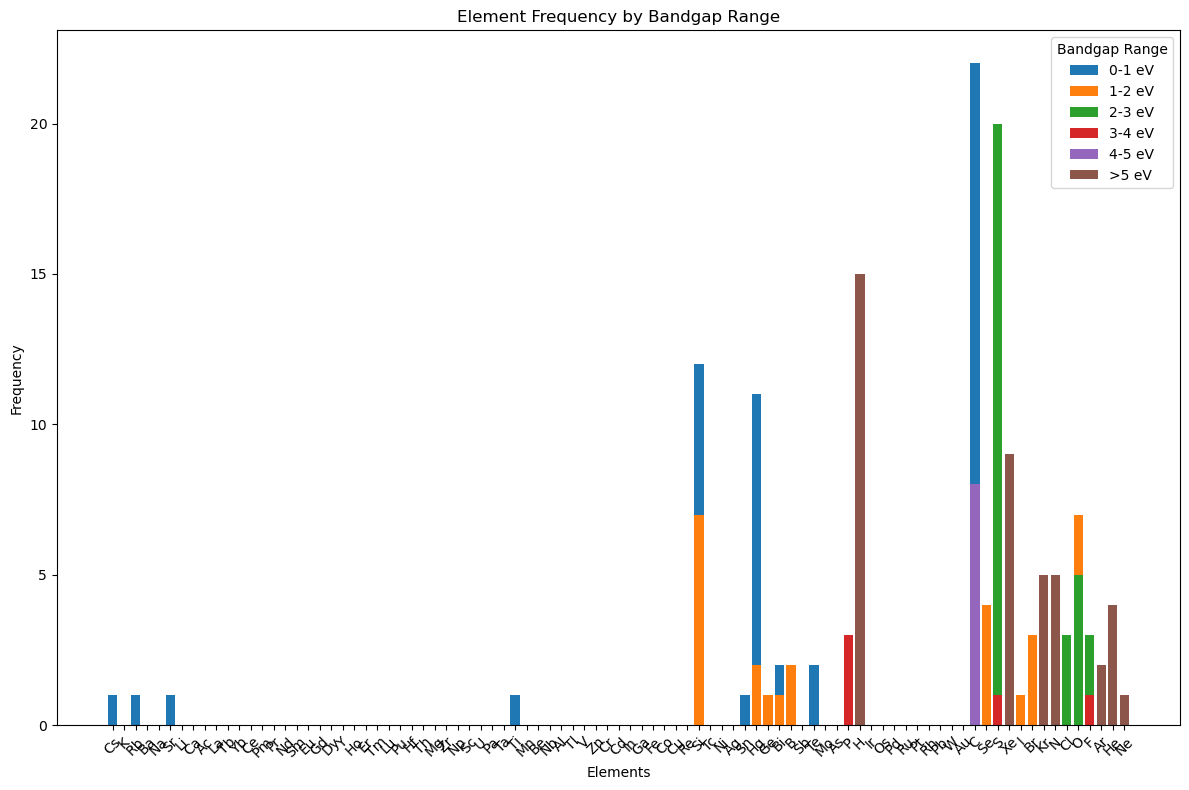

In [17]:
import matplotlib.pyplot as plt

# Define bandgap ranges for grouping
materialsdf['bandgap_range'] = pd.cut(
    materialsdf['band_gap'], bins=[0, 1, 2, 3, 4, 5, float('inf')],
    labels=['0-1 eV', '1-2 eV', '2-3 eV', '3-4 eV', '4-5 eV', '>5 eV']
)

# Explode 'elements' column to get individual elements
exploded_elements = materialsdf.explode('elements')

# Group by bandgap range and count element frequency
element_frequency = exploded_elements.groupby(['bandgap_range', 'elements']).size().reset_index(name='count')

# Plot frequency of elements by bandgap range
plt.figure(figsize=(12, 8))
for bandgap_range in element_frequency['bandgap_range'].unique():
    subset = element_frequency[element_frequency['bandgap_range'] == bandgap_range]
    plt.bar((subset['elements']).astype(str), subset['count'], label=bandgap_range)

plt.title('Element Frequency by Bandgap Range')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Bandgap Range')
plt.tight_layout()
plt.show()


#### Heatmap for Element Co-occurrence

Build a heatmap to show how often elements co-occur in the dataset.

In [19]:
for elements in materialsdf['elements']:
    for ele1, ele2 in combinations(elements, 2):
        if ele1 in relevant_elements and ele2 in relevant_elements:
            print(f"Counting pair: {ele1}, {ele2}")
            co_occurrence.loc[ele1, ele2] += 1
            co_occurrence.loc[ele2, ele1] += 1


#### Bandgap vs. Volume

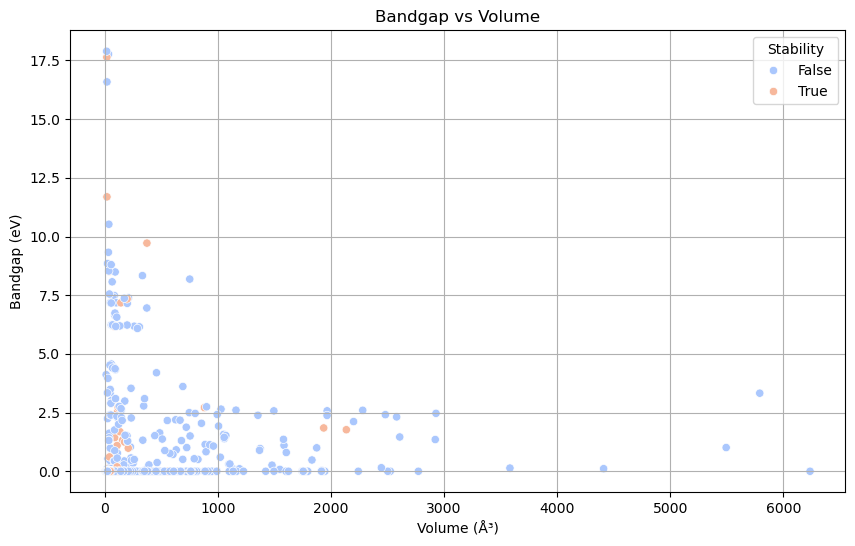

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=materialsdf, x='volume', y='band_gap', hue='is_stable', palette='coolwarm')
plt.title('Bandgap vs Volume')
plt.xlabel('Volume (Å³)')
plt.ylabel('Bandgap (eV)')
plt.legend(title='Stability')
plt.grid(True)
plt.show()


#### Correlation Heatmap

Analyze relationships between key quantitative properties.

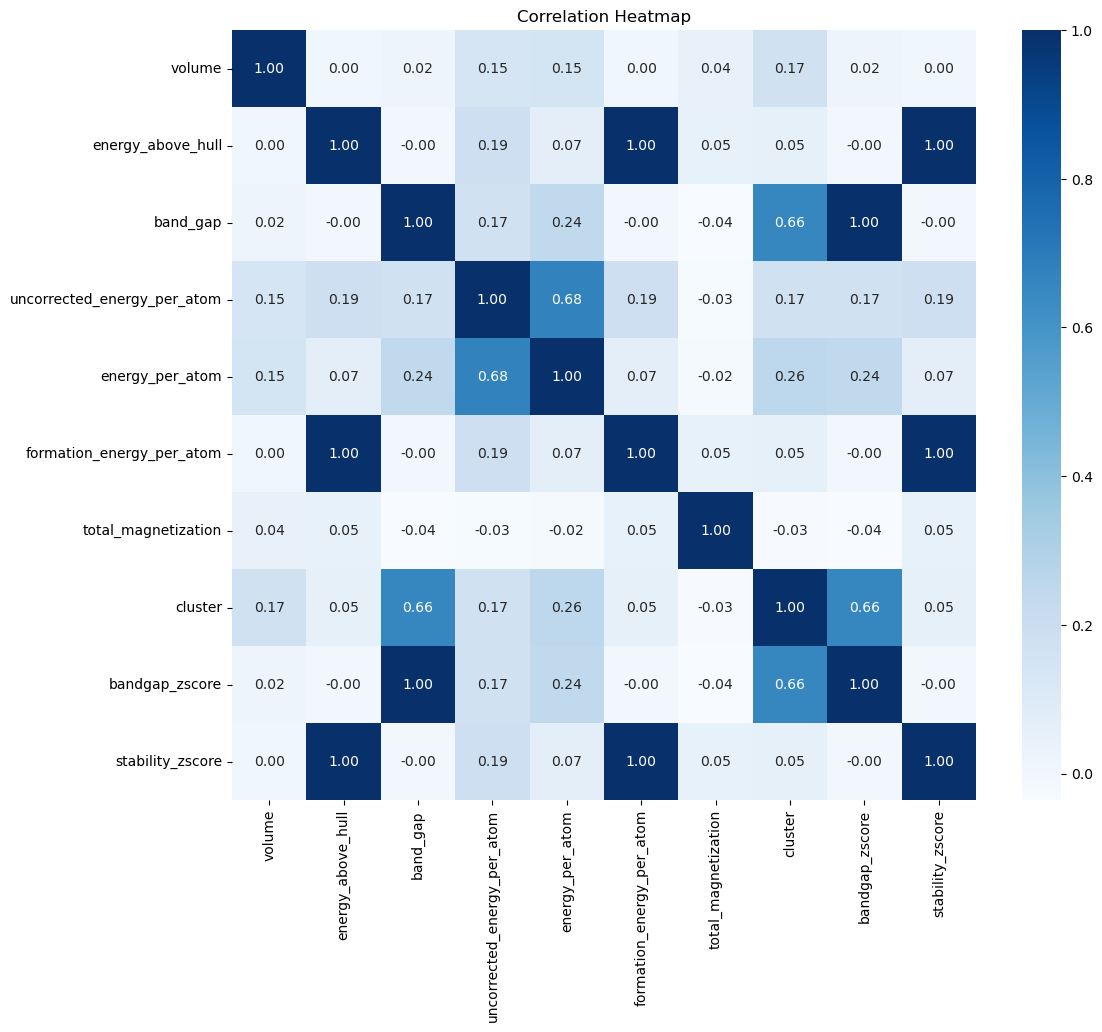

In [21]:
# Select numeric columns
numeric_cols = materialsdf.select_dtypes(include='number').dropna(axis=1)

# Compute correlation
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Stability vs. Formation Energy
Examine the relationship between formation_energy_per_atom and is_stable.

/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/3041952536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=materialsdf, x='is_stable', y='formation_energy_per_atom', palette='Set2')


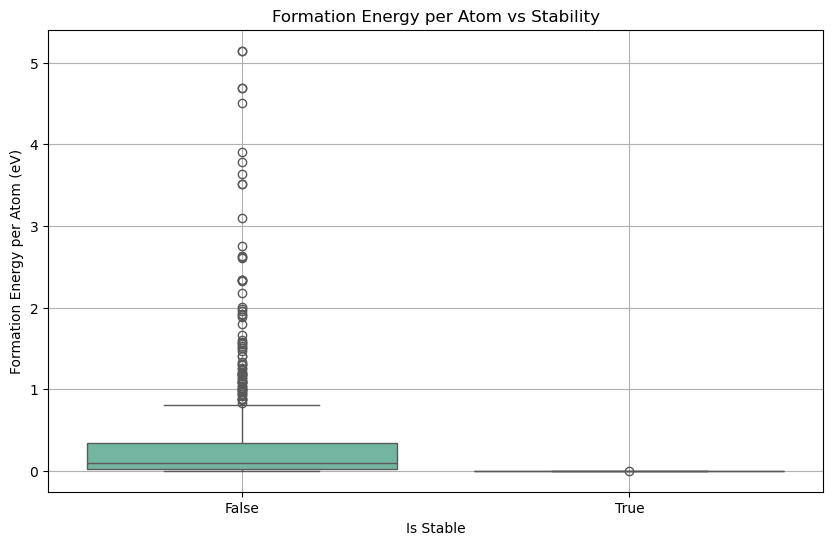

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=materialsdf, x='is_stable', y='formation_energy_per_atom', palette='Set2')
plt.title('Formation Energy per Atom vs Stability')
plt.xlabel('Is Stable')
plt.ylabel('Formation Energy per Atom (eV)')
plt.grid(True)
plt.show()


In [23]:
materialsdf.columns

Index(['composition', 'elements', 'formula_pretty', 'formula_anonymous',
       'symmetry', 'structure', 'volume', 'is_stable', 'energy_above_hull',
       'decomposes_to', 'band_gap', 'cbm', 'vbm', 'is_gap_direct',
       'bulk_modulus', 'shear_modulus', 'universal_anisotropy',
       'homogeneous_poisson', 'uncorrected_energy_per_atom', 'energy_per_atom',
       'formation_energy_per_atom', 'possible_species', 'is_metal',
       'total_magnetization', 'weighted_surface_energy',
       'weighted_work_function', 'material_id', 'chemsys', 'cluster',
       'bandgap_zscore', 'stability_zscore', 'bandgap_range'],
      dtype='object')

#### Magnetic Ordering Analysis
Investigate how magnetic_ordering relates to band_gap and is_stable.

#### Anisotropy vs. Stability
Analyze if universal_anisotropy affects the stability of materials.

/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/437596552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=materialsdf, x='is_stable', y='universal_anisotropy', palette='muted', scale='width')
/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/437596552.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=materialsdf, x='is_stable', y='universal_anisotropy', palette='muted', scale='width')


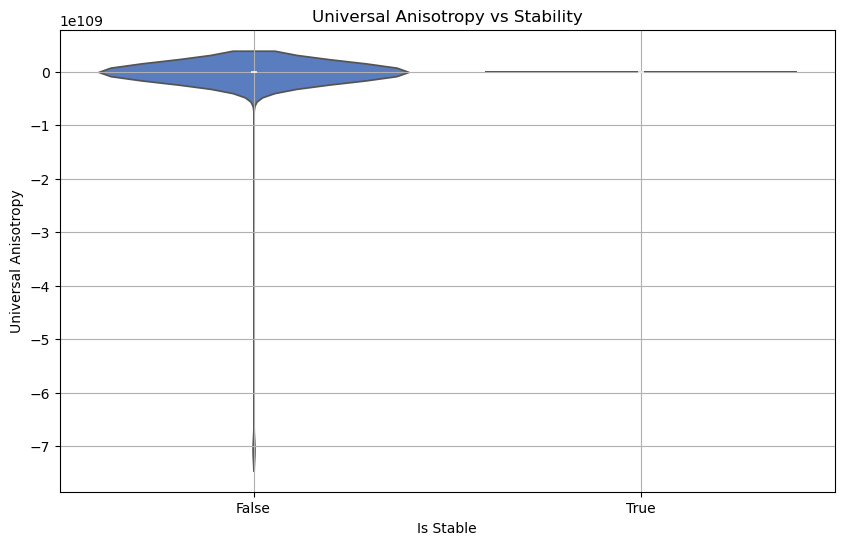

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=materialsdf, x='is_stable', y='universal_anisotropy', palette='muted', scale='width')
plt.title('Universal Anisotropy vs Stability')
plt.xlabel('Is Stable')
plt.ylabel('Universal Anisotropy')
plt.grid(True)
plt.show()


/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/3188785368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=materialsdf, x='is_gap_direct', palette='pastel')


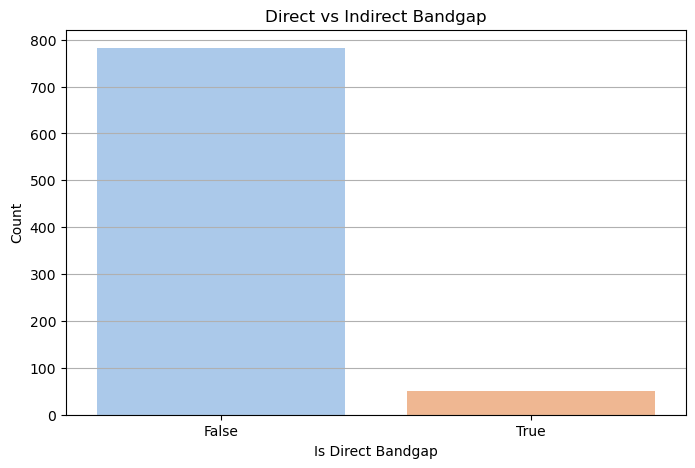

In [25]:
# Count plot for direct vs indirect bandgap
plt.figure(figsize=(8, 5))
sns.countplot(data=materialsdf, x='is_gap_direct', palette='pastel')
plt.title('Direct vs Indirect Bandgap')
plt.xlabel('Is Direct Bandgap')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


To infer merging between A cations, B cations, and X anions from the dataset (ABX₃ perovskites), we need to evaluate their chemical compatibility, structural constraints, and electronic properties. This requires analyzing the dataset to identify plausible combinations and their potential to form stable ABX₃ structures.

1. Extract Relevant Components
* A-cations: Large cations like Cs, MA, FA, K, etc.
* B-cations: Transition metals like Sn, Ge, Bi, etc.
* X-anions: Halides and pseudohalides like Cl, Br, I, SCN, etc.

#### A-cations

In [27]:
# Extract unique values for A, B, and X components
# Get unique elements
A_cations = materialsdf['elements'].explode().unique()
A_cations

array([Element Ac, Element Ag, Element Al, Element Ar, Element As,
       Element Au, Element B, Element Ba, Element Be, Element Bi,
       Element Br, Element C, Element Ca, Element Cd, Element Ce,
       Element Cl, Element Co, Element Cr, Element Cs, Element Cu,
       Element Dy, Element Er, Element Eu, Element F, Element Fe,
       Element Ga, Element Gd, Element Ge, Element H, Element He,
       Element Hf, Element Hg, Element Ho, Element I, Element In,
       Element Ir, Element K, Element Kr, Element La, Element Li,
       Element Lu, Element Mg, Element Mn, Element Mo, Element N,
       Element Na, Element Nb, Element Nd, Element Ne, Element Ni,
       Element Np, Element O, Element Os, Element P, Element Pa,
       Element Pb, Element Pd, Element Pm, Element Pr, Element Pt,
       Element Pu, Element Rb, Element Re, Element Rh, Element Ru,
       Element S, Element Sb, Element Sc, Element Se, Element Si,
       Element Sm, Element Sn, Element Sr, Element Ta, Element Tb,
     

In [28]:
# Convert elements to string for filtering
A_cations_str = [str(element) for element in materialsdf['elements'].explode().unique()]
print(A_cations_str)


['Ac', 'Ag', 'Al', 'Ar', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'He', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Np', 'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pm', 'Pr', 'Pt', 'Pu', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr']


In [29]:
# Define A-cations of interest
# A_cations_of_interest = ['Cs', 'MA', 'FA']

A_cations_of_interest = ['H','Li', 'Na', 'K', 'Rb', 'Cs', 'Cu', 'Ag', 'Au']

# Define B-cations and X-anions of interest
# B_cations_of_interest = ['Sn', 'Ge', 'Bi']
B_cations_of_interest = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra', 'Ti', 'Cr', 'Fe',
                         'Ni', 'Pd', 'Pt', 'Cu', 'Zn', 'Cd', 'Hg', 'C','Si', 'Ge', 'Sn', 'Po',
                         'Sm', 'Eu', 'Yb', 'Md', 'No']

# X_anions_of_interest = ['Cl', 'Br', 'I', 'SCN', 'N3']

X_anions_of_interest = ['F', 'Cl', 'Br', 'I', 'SCN', 'O3SCF3', 'HCOO', 'C2H3O2','CF3CO2','OH','HS']


In [30]:
# Filter the A-cations
A_cations_filtered = [element for element in A_cations_str if element in A_cations_of_interest]
print(f"Filtered A-cations: {A_cations_filtered}")

# Filter materialsdf for rows containing elements in A_cations_filtered
A_cations_df = materialsdf[materialsdf['elements'].apply(lambda x: any(str(el) in A_cations_filtered for el in x))]

A_cations_df['elements'] = A_cations_df['elements'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
)

# Display the filtered DataFrame
print(A_cations_df.shape)
A_cations_df.head()
A_cations_df.to_csv('A_cations_df.csv')

Filtered A-cations: ['Ag', 'Au', 'Cs', 'Cu', 'H', 'K', 'Li', 'Na', 'Rb']
(126, 32)


/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/2003575283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_cations_df['elements'] = A_cations_df['elements'].apply(


In [31]:
# Filter B-cations and X-anions
B_cations_filtered = [element for element in A_cations_str if element in B_cations_of_interest]
print(f"Filtered B-cations: {B_cations_filtered}")

# Filter materialsdf for rows containing elements in A_cations_filtered
B_cations_df = materialsdf[materialsdf['elements'].apply(lambda x: any(str(el) in B_cations_filtered for el in x))]

# Convert the 'elements' column to strings properly
B_cations_df['elements'] = B_cations_df['elements'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
)

# Display the filtered DataFrame
print(B_cations_df.shape)
B_cations_df.head()

B_cations_df.to_csv('B_cations_df.csv')

Filtered B-cations: ['Ba', 'Be', 'C', 'Ca', 'Cd', 'Cr', 'Cu', 'Eu', 'Fe', 'Ge', 'Hg', 'Mg', 'Ni', 'Pd', 'Pt', 'Si', 'Sm', 'Sn', 'Sr', 'Ti', 'Yb', 'Zn']
(278, 32)


/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/2083879997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_cations_df['elements'] = B_cations_df['elements'].apply(


In [32]:
X_anions_filtered = [element for element in A_cations_str if element in X_anions_of_interest]
print(f"Filtered X-anions: {X_anions_filtered}")

# Filter materialsdf for rows containing elements in A_cations_filtered
X_anions_df = materialsdf[materialsdf['elements'].apply(lambda x: any(str(el) in X_anions_filtered for el in x))]
# Convert the 'elements' column to strings properly
X_anions_df['elements'] = X_anions_df['elements'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
)

# Display the filtered DataFrame
print(X_anions_df.shape)
X_anions_df.head()

X_anions_df.to_csv('X_anions_df.csv')

Filtered X-anions: ['Br', 'Cl', 'F', 'I']
(24, 32)


/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_66936/4175475587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_anions_df['elements'] = X_anions_df['elements'].apply(


In [33]:
type(X_anions_df.elements.iloc[0])

str

### Goldschmidt Tolerance Factor

In [34]:
import json
with open("shannon-radii.json") as f:
    out = f.read()

data = json.loads(out)

rows = []
# Loop through the JSON data to construct the DataFrame
for element, oxidation_states in data.items():
    for ox_state, ox_data in oxidation_states.items():
        for ox_type, properties in ox_data.items():
            # Creating the columns
            row = {
                'element': element,  # Element column (e.g., 'Ru')
                'oxidation_state': ox_state,  # Oxidation state column (e.g., '8')
                'element_oxidation_state': f"{element}{ox_state}",  # Combined element and oxidation state (e.g., 'Ru8')
                'oxidation_type': ox_type,  # Oxidation type (e.g., 'IV' or 'VI')
                'r_crystal': properties.get('r_crystal', None),  # r_crystal value
                'remark': properties.get('remark', None),  # remark value
                'r_ionic': properties.get('r_ionic', None),  # r_ionic value
            }
            rows.append(row)

# Convert the list of dictionaries into a DataFrame
shannon_df = pd.DataFrame(rows)
shannon_df.to_csv('ShannonDataset.csv')
print("Duplicate rows:", shannon_df.duplicated().sum())
shannon_df
# print(d['Cd']['2']['VII']['r_ionic'])

Duplicate rows: 0


,element,oxidation_state,element_oxidation_state,oxidation_type,r_crystal,remark,r_ionic
0,Ru,8,Ru8,IV,0.500,,0.360
1,Ru,3,Ru3,VI,0.820,,0.680
2,Ru,5,Ru5,VI,0.705,ER,0.565
3,Ru,4,Ru4,VI,0.760,RM,0.620
4,Ru,7,Ru7,IV,0.520,,0.380
...,...,...,...,...,...,...,...
492,Mo,4,Mo4,VI,0.790,RM,0.650
493,Mo,6,Mo6,VI,0.730,R*,0.590
494,Mo,6,Mo6,V,0.640,,0.500
495,Mo,6,Mo6,VII,0.870,,0.730


In [3]:
shannon_df.loc[50]

element                                     P
oxidation_state                             5
element_oxidation_state                    P5
oxidation_type                              V
r_crystal                                0.43
remark                                       
r_ionic                                  0.29
group                      Reactive nonmetals
Name: 50, dtype: object

In [1]:
import json
import pandas as pd

# Load JSON data
with open("shannon-radii.json") as f:
    out = f.read()
data = json.loads(out)

# Create DataFrame
rows = []
for element, oxidation_states in data.items():
    for ox_state, ox_data in oxidation_states.items():
        for ox_type, properties in ox_data.items():
            row = {
                'element': element,
                'oxidation_state': ox_state,
                'element_oxidation_state': f"{element}{ox_state}",
                'oxidation_type': ox_type,
                'r_crystal': properties.get('r_crystal', None),
                'remark': properties.get('remark', None),
                'r_ionic': properties.get('r_ionic', None),
            }
            rows.append(row)
shannon_df = pd.DataFrame(rows)

# Remove duplicates if any
shannon_df = shannon_df.drop_duplicates()
print(f"Duplicate rows removed: {shannon_df.duplicated().sum()}")

# Define element-to-group mapping
element_groups = {
    'Li': 'Alkali metals', 'Na': 'Alkali metals', 'K': 'Alkali metals', 'Rb': 'Alkali metals', 'Cs': 'Alkali metals', 'Fr': 'Alkali metals',
    'Be': 'Alkaline earth metals', 'Mg': 'Alkaline earth metals', 'Ca': 'Alkaline earth metals', 'Sr': 'Alkaline earth metals', 'Ba': 'Alkaline earth metals', 'Ra': 'Alkaline earth metals',
    'Sc': 'Transition metals', 'Ti': 'Transition metals', 'V': 'Transition metals', 'Cr': 'Transition metals', 'Mn': 'Transition metals',
    'Fe': 'Transition metals', 'Co': 'Transition metals', 'Ni': 'Transition metals', 'Cu': 'Transition metals', 'Zn': 'Transition metals',
    'Y': 'Transition metals', 'Zr': 'Transition metals', 'Nb': 'Transition metals', 'Mo': 'Transition metals', 'Tc': 'Transition metals',
    'Ru': 'Transition metals', 'Rh': 'Transition metals', 'Pd': 'Transition metals', 'Ag': 'Transition metals', 'Cd': 'Transition metals',
    'La': 'Transition metals', 'Hf': 'Transition metals', 'Ta': 'Transition metals', 'W': 'Transition metals', 'Re': 'Transition metals',
    'Os': 'Transition metals', 'Ir': 'Transition metals', 'Pt': 'Transition metals', 'Au': 'Transition metals', 'Hg': 'Transition metals',
    'Al': 'Post-transition metals', 'Ga': 'Post-transition metals', 'In': 'Post-transition metals', 'Tl': 'Post-transition metals',
    'Sn': 'Post-transition metals', 'Pb': 'Post-transition metals', 'Bi': 'Post-transition metals',
    'B': 'Metalloids', 'Si': 'Metalloids', 'Ge': 'Metalloids', 'As': 'Metalloids', 'Sb': 'Metalloids', 'Te': 'Metalloids',
    'N': 'Reactive nonmetals', 'O': 'Reactive nonmetals', 'F': 'Reactive nonmetals', 'P': 'Reactive nonmetals', 'S': 'Reactive nonmetals',
    'Cl': 'Reactive nonmetals', 'Se': 'Reactive nonmetals', 'Br': 'Reactive nonmetals', 'I': 'Reactive nonmetals',
    'He': 'Noble gases', 'Ne': 'Noble gases', 'Ar': 'Noble gases', 'Kr': 'Noble gases', 'Xe': 'Noble gases', 'Rn': 'Noble gases',
    'Ce': 'Lanthanides', 'Pr': 'Lanthanides', 'Nd': 'Lanthanides', 'Pm': 'Lanthanides', 'Sm': 'Lanthanides', 'Eu': 'Lanthanides',
    'Gd': 'Lanthanides', 'Tb': 'Lanthanides', 'Dy': 'Lanthanides', 'Ho': 'Lanthanides', 'Er': 'Lanthanides', 'Tm': 'Lanthanides',
    'Yb': 'Lanthanides', 'Lu': 'Lanthanides',
    'Ac': 'Actinides', 'Th': 'Actinides', 'Pa': 'Actinides', 'U': 'Actinides', 'Np': 'Actinides', 'Pu': 'Actinides',
    'Am': 'Actinides', 'Cm': 'Actinides', 'Bk': 'Actinides', 'Cf': 'Actinides', 'Es': 'Actinides', 'Fm': 'Actinides',
    'Md': 'Actinides', 'No': 'Actinides', 'Lr': 'Actinides'
}

# Assign groups
shannon_df['group'] = shannon_df['element'].map(element_groups).fillna('Unknown properties')

# Define group names
groups = [
    'Alkali metals', 'Alkaline earth metals', 'Transition metals', 'Post-transition metals',
    'Metalloids', 'Reactive nonmetals', 'Noble gases', 'Lanthanides', 'Actinides', 'Unknown properties'
]

# Create and save subsets
subsets = {}
for group in groups:
    # Filter DataFrame for the group
    df_subset = shannon_df[shannon_df['group'] == group].copy()
    subsets[group] = df_subset
    
    # Save to CSV (skip empty DataFrames)
    if not df_subset.empty:
        csv_filename = f'shannon_{group.replace(" ", "_").lower()}.csv'
        df_subset.to_csv(csv_filename, index=False)
        print(f"Saved subset for '{group}' to '{csv_filename}' with {len(df_subset)} rows and {df_subset['element'].nunique()} unique elements: {df_subset['element'].unique().tolist()}")
    else:
        print(f"No data for '{group}' (empty subset)")

# Optional: Summary of all subsets
summary = []
for group in groups:
    df_subset = subsets[group]
    summary.append({
        'group': group,
        'row_count': len(df_subset),
        'unique_elements': df_subset['element'].nunique(),
        'elements': df_subset['element'].unique().tolist()
    })
summary_df = pd.DataFrame(summary)
print("\nSummary of Subsets:")
print(summary_df)

# Save summary
summary_df.to_csv('shannon_subsets_summary.csv', index=False)
print("\nSubset summary saved to 'shannon_subsets_summary.csv'")

Duplicate rows removed: 0
Saved subset for 'Alkali metals' to 'shannon_alkali_metals.csv' with 32 rows and 6 unique elements: ['Rb', 'K', 'Na', 'Fr', 'Cs', 'Li']
Saved subset for 'Alkaline earth metals' to 'shannon_alkaline_earth_metals.csv' with 28 rows and 6 unique elements: ['Ra', 'Be', 'Ba', 'Mg', 'Sr', 'Ca']
Saved subset for 'Transition metals' to 'shannon_transition_metals.csv' with 188 rows and 30 unique elements: ['Ru', 'Re', 'Rh', 'Os', 'Pt', 'Pd', 'Hf', 'Hg', 'Mn', 'W', 'Zn', 'Zr', 'Ni', 'Nb', 'Fe', 'V', 'Sc', 'Co', 'Cd', 'Cr', 'Cu', 'La', 'Ti', 'Tc', 'Ta', 'Y', 'Ag', 'Ir', 'Au', 'Mo']
Saved subset for 'Post-transition metals' to 'shannon_post-transition_metals.csv' with 36 rows and 7 unique elements: ['Bi', 'Ga', 'Pb', 'Sn', 'Tl', 'Al', 'In']
Saved subset for 'Metalloids' to 'shannon_metalloids.csv' with 21 rows and 6 unique elements: ['Ge', 'B', 'Si', 'Sb', 'Te', 'As']
Saved subset for 'Reactive nonmetals' to 'shannon_reactive_nonmetals.csv' with 40 rows and 9 unique elemen

In [35]:
A_cations_df.columns

Index(['composition', 'elements', 'formula_pretty', 'formula_anonymous',
       'symmetry', 'structure', 'volume', 'is_stable', 'energy_above_hull',
       'decomposes_to', 'band_gap', 'cbm', 'vbm', 'is_gap_direct',
       'bulk_modulus', 'shear_modulus', 'universal_anisotropy',
       'homogeneous_poisson', 'uncorrected_energy_per_atom', 'energy_per_atom',
       'formation_energy_per_atom', 'possible_species', 'is_metal',
       'total_magnetization', 'weighted_surface_energy',
       'weighted_work_function', 'material_id', 'chemsys', 'cluster',
       'bandgap_zscore', 'stability_zscore', 'bandgap_range'],
      dtype='object')

In [36]:
# Ensure the 'Element' column is consistent in both datasets
shannon_df['element'] = shannon_df['element'].str.strip()

# Merge ionic radii with A_cations_df
A_cations_df = A_cations_df.merge(shannon_df, left_on='elements', right_on='element', how='left')

# Merge ionic radii with B_cations_df
B_cations_df = B_cations_df.merge(shannon_df, left_on='elements', right_on='element', how='left')

# Merge ionic radii with X_anion_df
X_anions_df = X_anions_df.merge(shannon_df, left_on='elements', right_on='element', how='left')

# Rename the 'Radius' column for clarity
A_cations_df.rename(columns={'r_ionic': 'r_A'}, inplace=True)
B_cations_df.rename(columns={'r_ionic': 'r_B'}, inplace=True)
X_anions_df.rename(columns={'r_ionic': 'r_X'}, inplace=True)

X_anions_df.elements.value_counts()

elements
Br    40
F     35
I     30
Cl    12
Name: count, dtype: int64

In [37]:
A_radii = A_cations_df['r_A']
B_radii = B_cations_df['r_B']
X_radii = X_anions_df['r_X']

def calculate_tolerance_factor(r_A, r_B, r_X):
    return (r_A + r_X) / (2 * (r_B + r_X))

# Calculate tolerance factor
tolerance_factor = calculate_tolerance_factor(A_radii, B_radii, X_radii)
tolerance_factor

0       0.429775
1       0.372685
2       0.460725
3       0.392655
4       0.275449
          ...   
1336         NaN
1337         NaN
1338         NaN
1339         NaN
1340         NaN
Length: 1341, dtype: float64

In [38]:
# Combine relevant columns from the DataFrames
result_df = pd.DataFrame({
    'A_element': A_cations_df['elements'],
    'B_element': B_cations_df['elements'],
    'X_element': X_anions_df['elements'],
    'tolerance_factor': tolerance_factor
})

# Display the result
print(result_df)


     A_element B_element X_element  tolerance_factor
0           Ag        Ba        Br          0.429775
1           Ag        Ba        Br          0.372685
2           Ag        Ba        Br          0.460725
3           Ag        Ba        Br          0.392655
4           Ag        Ba        Br          0.275449
...        ...       ...       ...               ...
1336       NaN        Zn       NaN               NaN
1337       NaN        Zn       NaN               NaN
1338       NaN        Zn       NaN               NaN
1339       NaN        Zn       NaN               NaN
1340       NaN        Zn       NaN               NaN

[1341 rows x 4 columns]


In [39]:
stable_df = result_df[(result_df['tolerance_factor'] >= 0.8) & (result_df['tolerance_factor'] <= 1.0)]
print(stable_df)


    A_element B_element X_element  tolerance_factor
77         Cs        Be         F          0.883285
79         Cs        Be         F          0.945860
80         Cs        Be         F          0.866477
82         Cs        Be         F          0.995177
83         Cs        Be         F          0.873596
85         Cs        Be         F          0.943038
89         Cs         C         I          0.843220
94         Cs         C         I          0.853191
99         Cs         C         I          0.962264
104        Cs         C         I          0.834746
109        Cs         C         I          0.823404
114        Cs         C         I          0.955189


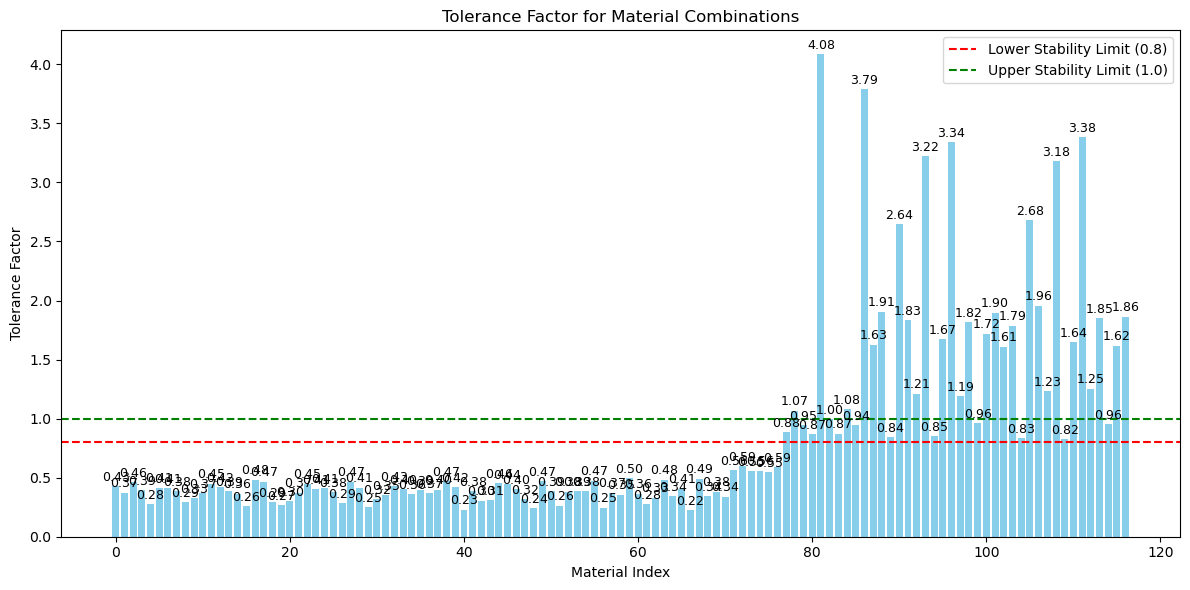

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Filter for valid tolerance factors
valid_result_df = result_df.dropna()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    valid_result_df.index,
    valid_result_df['tolerance_factor'],
    color='skyblue'
)

# Add stability limits
plt.axhline(0.8, color='red', linestyle='--', label='Lower Stability Limit (0.8)')
plt.axhline(1.0, color='green', linestyle='--', label='Upper Stability Limit (1.0)')

# Annotate each bar with the tolerance factor value
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):  # Use numpy.isnan to check for NaN values
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height + 0.02,  # Slightly above the bar
            f"{height:.2f}",  # Format as 2 decimal places
            ha='center', va='bottom', fontsize=9, color='black'
        )

plt.xlabel("Material Index")
plt.ylabel("Tolerance Factor")
plt.title("Tolerance Factor for Material Combinations")
plt.legend()
plt.tight_layout()
plt.show()


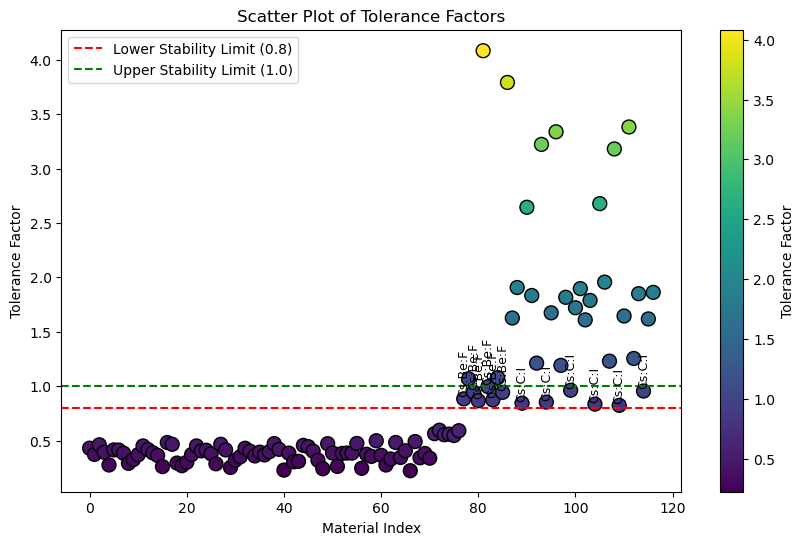

In [41]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    valid_result_df.index,
    valid_result_df['tolerance_factor'],
    c=valid_result_df['tolerance_factor'],
    cmap='viridis',
    edgecolor='k',
    s=100
)

# Add horizontal lines for the stability limits
plt.axhline(0.8, color='red', linestyle='--', label='Lower Stability Limit (0.8)')
plt.axhline(1.0, color='green', linestyle='--', label='Upper Stability Limit (1.0)')

# Add a color bar for tolerance factor
plt.colorbar(label='Tolerance Factor')

# Annotate the scatter plot points within the tolerance range
for i, row in valid_result_df.iterrows():
    if 0.8 <= row['tolerance_factor'] <= 1.0:  # Check if the tolerance factor is within the range
        plt.text(
            row.name,  # x-coordinate (index of the row)
            row['tolerance_factor'] + 0.02,  # y-coordinate (tolerance factor, slightly above the point)
            f"{row['A_element']}:{row['B_element']}:{row['X_element']}",  # Material combination
            ha='center', va='bottom', fontsize=9, color='black', rotation = 90
        )

# Add labels and title
plt.xlabel("Material Index")
plt.ylabel("Tolerance Factor")
plt.title("Scatter Plot of Tolerance Factors")

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Your approach has a few areas for improvement:

Data Filtering Issues:


Your relevant_elements list has duplicates and mixes compound formulas with elements
The element filtering doesn't account for coordination environments or oxidation states
You're not utilizing the composition and composition_reduced columns which would be more reliable than elements


Key Properties You Should Include:


symmetry: Crucial for identifying perovskite structure
structure: Contains bond lengths and angles
formation_energy_per_atom: Important for stability prediction
energy_above_hull: Key stability indicator


Suggested Improvements:

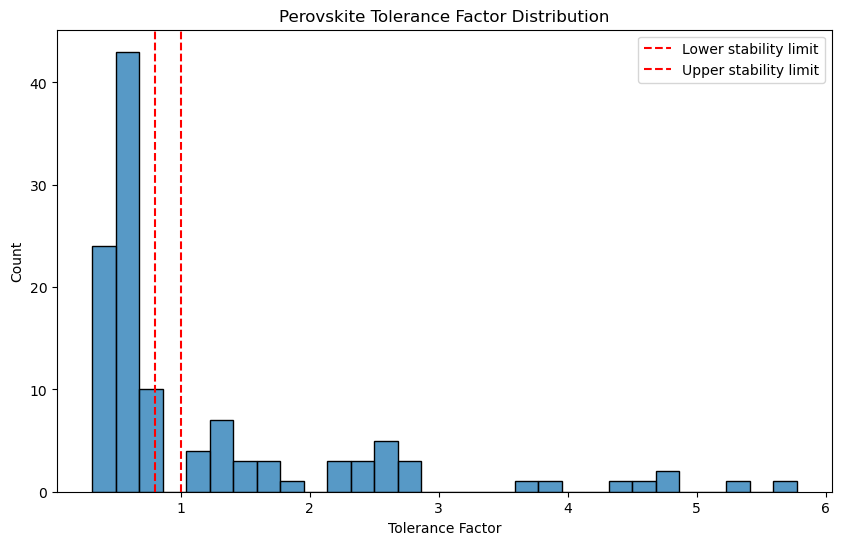


Synthesis Recommendations:
    composition                     method       solvent  tolerance_factor
0       AgBaBr3  Mechanochemical synthesis  Solvent-free          0.607794
1       AgBaBr3  Mechanochemical synthesis  Solvent-free          0.527056
2       AgBaBr3  Mechanochemical synthesis  Solvent-free          0.651564
3       AgBaBr3  Mechanochemical synthesis  Solvent-free          0.555299
4       AgBaBr3  Mechanochemical synthesis  Solvent-free          0.389544
..          ...                        ...           ...               ...
112       CsCI3  Mechanochemical synthesis  Solvent-free          1.774195
113       CsCI3  Mechanochemical synthesis  Solvent-free          2.616295
114       CsCI3  Mechanochemical synthesis  Solvent-free          1.350841
115       CsCI3  Mechanochemical synthesis  Solvent-free          2.287698
116       CsCI3  Mechanochemical synthesis  Solvent-free          2.633363

[117 rows x 4 columns]


In [42]:
class PerovskiteAnalyzer:
    def __init__(self, shannon_df, A_cations_df, B_cations_df, X_anions_df):
        self.shannon_df = shannon_df.copy()
        self.A_cations_df = A_cations_df.copy()
        self.B_cations_df = B_cations_df.copy()
        self.X_anions_df = X_anions_df.copy()
        self.prepare_data()
        
    def prepare_data(self):
        """Clean and prepare datasets"""
        # Standardize element columns
        self.shannon_df['element'] = self.shannon_df['element'].str.strip()
        
        # Merge ionic radii data
        self._merge_ionic_radii()
        
        # Calculate stability parameters
        self.calculate_tolerance_factors()
        
    def _merge_ionic_radii(self):
        """Merge Shannon radii with cation/anion dataframes"""
        for df, name in [(self.A_cations_df, 'r_A'), 
                        (self.B_cations_df, 'r_B'),
                        (self.X_anions_df, 'r_X')]:
            df.merge(self.shannon_df, 
                    left_on='elements',
                    right_on='element',
                    how='left')
            df.rename(columns={'r_ionic': name}, inplace=True)
            
    def calculate_tolerance_factors(self):
        """Calculate Goldschmidt tolerance factors"""
        self.tolerance_factors = pd.DataFrame({
            'A_element': self.A_cations_df['elements'],
            'B_element': self.B_cations_df['elements'],
            'X_element': self.X_anions_df['elements'],
            'tolerance_factor': self._goldschmidt_factor()
        })
        
    def _goldschmidt_factor(self):
        """Calculate Goldschmidt tolerance factor"""
        return (self.A_cations_df['r_A'] + self.X_anions_df['r_X']) / \
               (np.sqrt(2) * (self.B_cations_df['r_B'] + self.X_anions_df['r_X']))
               
    def calculate_octahedral_factor(self):
        """Calculate octahedral factor"""
        return self.B_cations_df['r_B'] / self.X_anions_df['r_X']
        
    def predict_stability(self):
        """Predict perovskite stability based on tolerance and octahedral factors"""
        t = self.tolerance_factors['tolerance_factor']
        μ = self.calculate_octahedral_factor()
        
        stable = (0.8 <= t) & (t <= 1.0) & \
                (0.442 <= μ) & (μ <= 0.895)
                
        return stable
        
    def visualize_stability(self):
        """Plot tolerance factor distribution"""
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.tolerance_factors, 
                    x='tolerance_factor',
                    bins=30)
        plt.axvline(x=0.8, color='r', linestyle='--', label='Lower stability limit')
        plt.axvline(x=1.0, color='r', linestyle='--', label='Upper stability limit')
        plt.title('Perovskite Tolerance Factor Distribution')
        plt.xlabel('Tolerance Factor')
        plt.ylabel('Count')
        plt.legend()
        plt.show()
        
    def generate_synthesis_recommendations(self):
        """Generate synthesis recommendations based on composition"""
        recommendations = []
        for _, row in self.tolerance_factors.iterrows():
            if pd.isna(row['tolerance_factor']):
                continue
                
            if 0.8 <= row['tolerance_factor'] <= 1.0:
                method = "Solution processing"
                if row['B_element'] in ['Pb', 'Sn']:
                    solvent = "DMF/DMSO mixture"
                else:
                    solvent = "DMF"
            else:
                method = "Mechanochemical synthesis"
                solvent = "Solvent-free"
                
            recommendations.append({
                'composition': f"{row['A_element']}{row['B_element']}{row['X_element']}3",
                'method': method,
                'solvent': solvent,
                'tolerance_factor': row['tolerance_factor']
            })
            
        return pd.DataFrame(recommendations)


# Load your data here
analyzer = PerovskiteAnalyzer(shannon_df, A_cations_df, B_cations_df, X_anions_df)

# Calculate stability
stable_compositions = analyzer.predict_stability()

# Visualize results
analyzer.visualize_stability()

# Get synthesis recommendations
recommendations = analyzer.generate_synthesis_recommendations()
print("\nSynthesis Recommendations:")
print(recommendations)

In [43]:
class PerovskiteCombinations:
    def __init__(self, materials_df, shannon_df):
        self.materials_df = materials_df
        self.shannon_df = shannon_df
        
        self.A_candidates = ['Cs', 'Rb', 'K']  # Limiting to inorganic for now
        self.B_candidates = ['Sn', 'Pb', 'Bi', 'Ge']
        self.X_candidates = ['Cl', 'Br', 'I']
        
    def get_ionic_radii(self, element, site_type):
        oxidation_states = {
            'A': 1,  # A-site cations typically +1
            'B': {'Sn': 2, 'Pb': 2, 'Bi': 3, 'Ge': 2},
            'X': -1  # Halides are -1
        }
        
        ox_state = oxidation_states[site_type] if isinstance(oxidation_states[site_type], int) else oxidation_states[site_type][element]
        
        return self.shannon_df[
            (self.shannon_df['element'] == element) & 
            (self.shannon_df['element_oxidation_state'] == f"{element}{ox_state}")
        ]['r_ionic'].values[0]
        
    def generate_combinations(self):
        combinations = []
        
        for a in self.A_candidates:
            for b in self.B_candidates:
                for x in self.X_candidates:
                    try:
                        r_a = self.get_ionic_radii(a, 'A')
                        r_b = self.get_ionic_radii(b, 'B')
                        r_x = self.get_ionic_radii(x, 'X')
                        
                        t = (r_a + r_x) / (np.sqrt(2) * (r_b + r_x))
                        μ = r_b / r_x
                        
                        if 0.8 < t < 1.0 and 0.442 < μ < 0.895:
                            combinations.append({
                                'formula': f"{a}{b}{x}3",
                                'type': 'ABX3',
                                'tolerance_factor': t,
                                'octahedral_factor': μ,
                                'r_A': r_a,
                                'r_B': r_b,
                                'r_X': r_x
                            })
                        
                        if 0.85 < t < 1.05:
                            combinations.append({
                                'formula': f"{a}2{b}{x}6",
                                'type': 'A2BX6',
                                'tolerance_factor': t,
                                'octahedral_factor': μ,
                                'r_A': r_a,
                                'r_B': r_b,
                                'r_X': r_x
                            })
                    except (IndexError, KeyError):
                        continue
                        
        return pd.DataFrame(combinations)

analyzer = PerovskiteCombinations(materialsdf, shannon_df)
possible_perovskites = analyzer.generate_combinations()
print(possible_perovskites)

     formula   type  tolerance_factor  octahedral_factor   r_A   r_B   r_X
0    CsPbCl3   ABX3          0.803327           0.745856  1.78  1.35  1.81
1    CsBiCl3   ABX3          0.893843           0.569061  1.78  1.03  1.81
2   Cs2BiCl6  A2BX6          0.893843           0.569061  1.78  1.03  1.81
3    CsBiBr3   ABX3          0.884475           0.525510  1.78  1.03  1.96
4   Cs2BiBr6  A2BX6          0.884475           0.525510  1.78  1.03  1.96
5     CsBiI3   ABX3          0.871296           0.468182  1.78  1.03  2.20
6    Cs2BiI6  A2BX6          0.871296           0.468182  1.78  1.03  2.20
7   Cs2GeCl6  A2BX6          0.999415           0.403315  1.78  0.73  1.81
8   Cs2GeBr6  A2BX6          0.983115           0.372449  1.78  0.73  1.96
9    Cs2GeI6  A2BX6          0.960507           0.331818  1.78  0.73  2.20
10   RbBiCl3   ABX3          0.856496           0.569061  1.63  1.03  1.81
11  Rb2BiCl6  A2BX6          0.856496           0.569061  1.63  1.03  1.81
12   RbBiBr3   ABX3      

 Computational Modeling

Loaded shannon data: (497, 8)
Loaded perovskite data: (14, 69)
Loaded A_cations data: (126, 33)
Loaded B_cations data: (278, 33)
Loaded X_anions data: (24, 33)
Generated combinations: 840672 rows

Generated combinations dataset:
      A   B   X  formula   r_A   r_B    r_X  tolerance_factor  \
0    Ag  Ba  Br  AgBaBr3  1.22  1.47  0.310          0.607794   
8    Ag  Ba  Cl  AgBaCl3  1.22  1.47  0.120          0.595926   
11   Ag  Ba   F   AgBaF3  1.22  1.47  1.285          0.642941   
18   Ag  Ba   I   AgBaI3  1.22  1.47  0.950          0.634059   
264  Ag  Be  Br  AgBeBr3  1.22  0.45  0.310          1.423518   

     octahedral_factor  
0             4.741935  
8            12.250000  
11            1.143969  
18            1.547368  
264           1.451613  
Combinations dataset saved to 'combinations_output.csv'
Original perovskite rows: 14
Unique perovskite formulas: 6
Duplicate formulas removed: 8


/var/folders/57/3msn0_891wn4tjm6zrx3jgvw0000gp/T/ipykernel_99299/324081766.py:87: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dft_data.groupby('formula', group_keys=False, observed=True)\



Training RF Model
Saved rf model to DFT_modeling/rf_model.pkl
Plot saved to ParityPlot.png


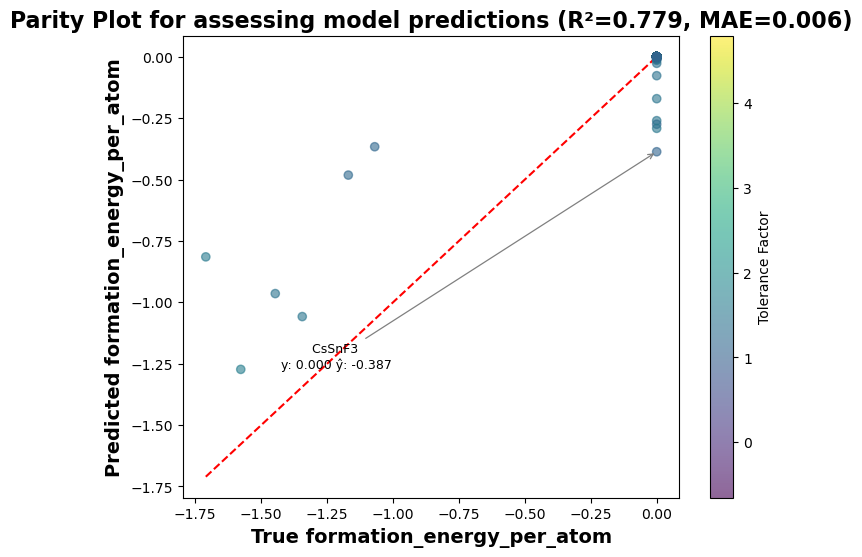


Training GBR Model
Saved gbr model to DFT_modeling/gbr_model.pkl
Plot saved to ParityPlot.png


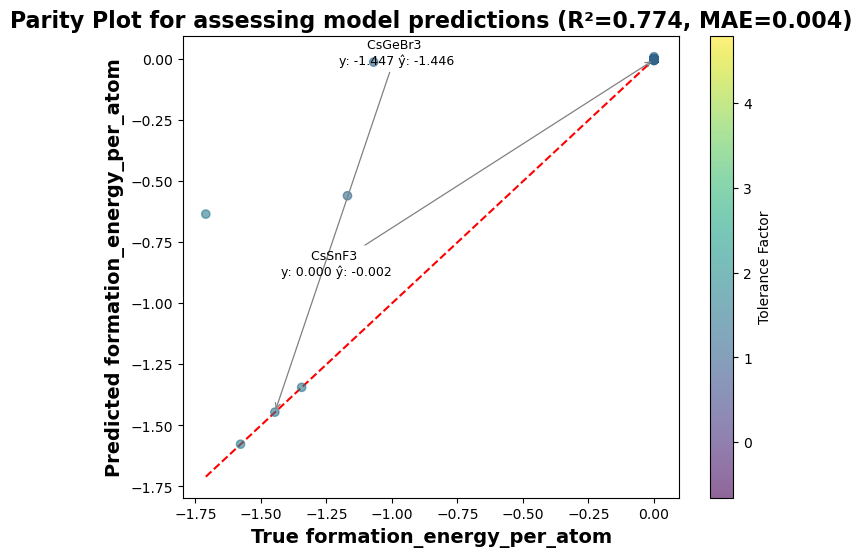


Training NN Model
Epoch 20/200 | Train Loss: 0.0088 | Test Loss: 0.0307
Epoch 40/200 | Train Loss: 0.0063 | Test Loss: 0.0261
Epoch 60/200 | Train Loss: 0.0023 | Test Loss: 0.0135
Epoch 80/200 | Train Loss: 0.0015 | Test Loss: 0.0160
Epoch 100/200 | Train Loss: 0.0004 | Test Loss: 0.0123
Epoch 120/200 | Train Loss: 0.0006 | Test Loss: 0.0102
Epoch 140/200 | Train Loss: 0.0006 | Test Loss: 0.0109
Saved nn model to DFT_modeling/nn_model.pkl
Plot saved to ParityPlot.png


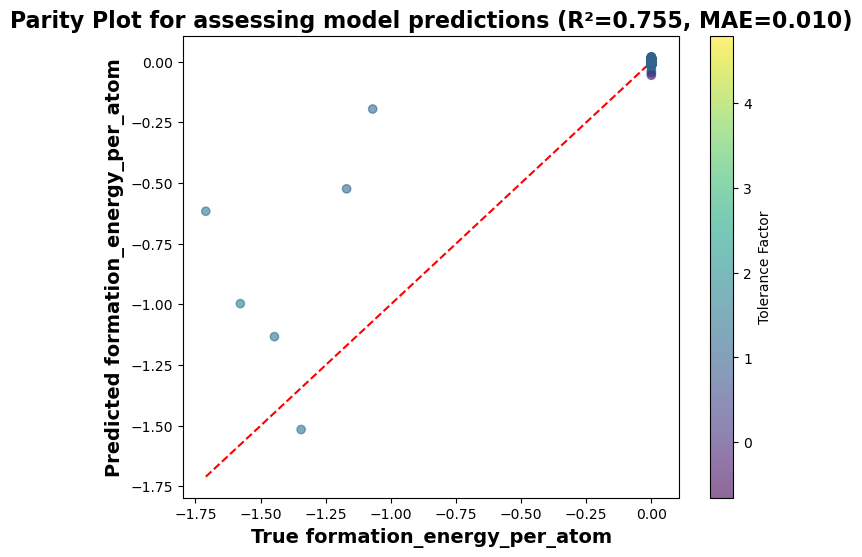

Plot saved to learning_curve.png


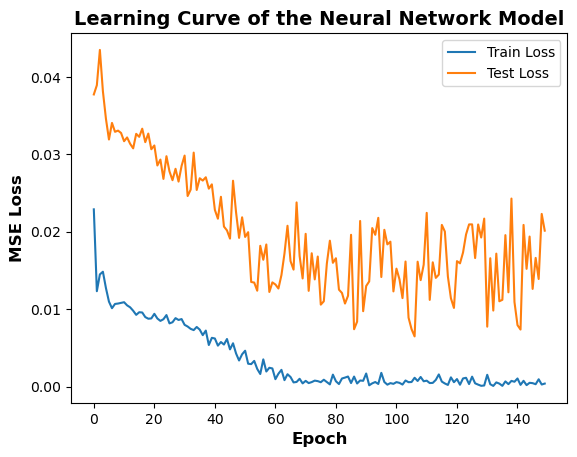


Analysis completed successfully!


In [2]:
import random

# Set the seed value
random.seed(42)


import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from itertools import product
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from pathlib import Path
from IPython.display import display

# Add this at the very top for Jupyter
%matplotlib inline

class PerovskiteNN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.network(x)

class PerovskitePredictor:
    def __init__(self, shannon_df, A_cations_df, B_cations_df, X_anions_df):
        self.shannon_df = shannon_df
        self.A_cations = A_cations_df
        self.B_cations = B_cations_df
        self.X_anions = X_anions_df
        self.combinations = pd.DataFrame()  
        self._generate_combinations()
        self._validate_initial_data()

    def _standardize_elements(self, df):
        """Convert elements to uppercase and validate against Shannon data"""
        df = df.copy()
        df['elements'] = df['elements'].str.strip().str.upper()
        valid_elements = set(self.shannon_df['element'])
        
        # Find invalid elements
        invalid = [e for e in df['elements'] if e not in valid_elements]
        if invalid:
            raise ValueError(f"Invalid elements in input: {invalid}. Check Shannon dataset.")
            
        return df

    

    def _validate_initial_data(self):
        """Ensure input DataFrames contain required columns"""
        required = {'shannon_df': ['element', 'r_ionic'],
                   'A_cations': ['elements'],
                   'B_cations': ['elements'],
                   'X_anions': ['elements']}
        
        for df_name, cols in required.items():
            df = getattr(self, df_name)
            missing = [c for c in cols if c not in df.columns]
            if missing:
                raise ValueError(f"{df_name} missing columns: {missing}")

    def balance_data(self, dft_data):
        """Safe data balancing with modern pandas syntax"""
        if 'formula' not in dft_data.columns:
            raise ValueError("Formula column missing for balancing")
            
        return dft_data.groupby('formula', group_keys=False, observed=True)\
                      .apply(lambda x: x.sample(min(len(x), 10)))\
                      .reset_index(drop=True)

    def _generate_combinations(self):
        """Generate combinations with validated elements"""
        combinations = []
        valid_elements = set(self.shannon_df['element'])
        
        for a in self.A_cations['elements']:
            for b in self.B_cations['elements']:
                for x in self.X_anions['elements']:
                    combinations.append({
                        'A': a,
                        'B': b,
                        'X': x,
                        'formula': f"{a}{b}{x}3"
                    })
        
        self.combinations = pd.DataFrame(combinations)
        return self.combinations

    def handle_missing_values(self, dft_data):
        """Handle missing values with column validation"""
        required = ['A', 'B', 'X', 'formula', 'formation_energy_per_atom']
        missing = [c for c in required if c not in dft_data.columns]
        if missing:
            raise ValueError(f"Missing required columns: {missing}")
            
        numerical_cols = dft_data.select_dtypes(include='number').columns
        dft_data[numerical_cols] = dft_data[numerical_cols].fillna(0)
        return dft_data

    def calculate_factors(self):
        """Calculate structural factors with validation"""
        # Get ionic radii
        for ion_type in ['A', 'B', 'X']:
            col_name = f'r_{ion_type}'
            self.combinations[col_name] = self.combinations[ion_type].apply(
                lambda x: self.shannon_df[self.shannon_df['element'] == x]['r_ionic'].values[0]
            )

        # Calculate factors
        self.combinations['tolerance_factor'] = (
            (self.combinations['r_A'] + self.combinations['r_X']) / 
            (np.sqrt(2) * (self.combinations['r_B'] + self.combinations['r_X']))
        )
        self.combinations['octahedral_factor'] = (
            self.combinations['r_B'] / self.combinations['r_X']
        )
        
        return self.combinations

    def prepare_features(self, dft_data):
        """Feature engineering with target protection"""
        required = [
            'A', 'B', 'X', 
            'tolerance_factor', 'octahedral_factor',
            'formation_energy_per_atom'
        ]
        
        missing = [c for c in required if c not in dft_data.columns]
        if missing:
            print("Available columns:", dft_data.columns.tolist())
            raise ValueError(f"Missing required columns: {missing}")
            
        features = pd.get_dummies(dft_data[['A', 'B', 'X']])
        for col in ['tolerance_factor', 'octahedral_factor']:
            features[col] = dft_data[col]
        return features

    def train_model(self, dft_data, property_name='formation_energy_per_atom', 
                   model_type='nn', save_model=True):
        """Full training pipeline with validation"""
        # Validate input data
        if property_name not in dft_data.columns:
            raise ValueError(f"Target property {property_name} not in data")
            
        # Feature preparation
        X = self.prepare_features(dft_data)
        y = dft_data[property_name]
        
        # Data splitting
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Model training
        if model_type == 'nn':
            model = self._train_nn(X_train_scaled, y_train, X_test_scaled, y_test)
        elif model_type == 'rf':
            model = RandomForestRegressor(n_estimators=300, random_state=42).fit(X_train_scaled, y_train)
        elif model_type == 'gbr':
            model = GradientBoostingRegressor(n_estimators=200, random_state=42).fit(X_train_scaled, y_train)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        # Model saving
        if save_model:
            output_dir = Path("DFT_modeling")
            output_dir.mkdir(exist_ok=True)
            
            model_path = output_dir / f"{model_type}_model.pkl"
            if isinstance(model, PerovskiteNN):
                torch.save(model.state_dict(), model_path)
            else:
                joblib.dump(model, model_path)
                
            joblib.dump(scaler, output_dir / f"{model_type}_scaler.pkl")
            print(f"Saved {model_type} model to {model_path}")

        return {'model': model, 'scaler': scaler, 'model_type': model_type}

    def _train_nn(self, X_train, y_train, X_test, y_test):
        """Neural network training with loss tracking"""
        model = PerovskiteNN(X_train.shape[1])
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        
        # Convert to tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)
        
        # Training loop
        train_losses = []
        test_losses = []
        for epoch in range(150):
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            
            # Track losses
            train_losses.append(loss.item())
            with torch.no_grad():
                test_loss = criterion(model(X_test_tensor), y_test_tensor)
                test_losses.append(test_loss.item())
            
            if (epoch+1) % 20 == 0:
                print(f"Epoch {epoch+1}/200 | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")
        
        model.train_losses = train_losses
        model.test_losses = test_losses
        return model

    def predict(self, trained_model, dft_data):
        """Safe prediction method"""
        X = self.prepare_features(dft_data)
        X_scaled = trained_model['scaler'].transform(X)
        
        if isinstance(trained_model['model'], PerovskiteNN):
            with torch.no_grad():
                return trained_model['model'](torch.FloatTensor(X_scaled)).numpy().flatten()
        else:
            return trained_model['model'].predict(X_scaled)

class PerovskiteVisualizer:
    def __init__(self, predictor, dft_data, trained_model):
        self.predictor = predictor
        self.dft_data = dft_data
        self.trained_model = trained_model
        self.predictions = predictor.predict(trained_model, dft_data)
        self.top_combinations = self._get_top_combinations()

    def _validate_data(self, data):
        required = ['formula', 'formation_energy_per_atom']
        missing = [c for c in required if c not in data.columns]
        if missing:
            raise ValueError(f"Visualization data missing columns: {missing}")

    def _safe_predict(self):
        try:
            return self.predictor.predict(self.trained_model, self.dft_data)
        except Exception as e:
            print("Prediction failed. Data sample:")
            display(self.dft_data.head())
            raise

    def _get_top_combinations(self, n=10):
        """Include target property in top candidates"""
        results = self.dft_data.copy()
        results['predicted'] = self.predictions
        return results.nsmallest(n, 'predicted')[[
            'formula', 
            'predicted',
            'formation_energy_per_atom',  # ADD THIS
            'tolerance_factor', 
            'octahedral_factor'
        ]]

    def plot_parity(self, property_name='formation_energy_per_atom'):
        """Enhanced parity plot with value annotations"""
        plt.figure(figsize=(8, 6))
        
        # Plot all points
        plt.scatter(
            self.dft_data[property_name], 
            self.predictions,
            c=self.dft_data['tolerance_factor'],
            cmap='viridis',
            alpha=0.6
        )
        
        # # Keep track of used annotation positions
        # used_positions = set()
        # unique_annotations = set()
        
        # for _, row in self.top_combinations.iterrows():
        #     # Check if the value combination is unique
        #     unique_key = (row[property_name], row['predicted'])
        #     if unique_key in unique_annotations:
        #         continue  # Skip if this combination has already been annotated
        
        #     # Add the combination to the set of unique annotations
        #     unique_annotations.add(unique_key)
        
        #     # Calculate initial annotation position
        #     annotation_x = -0.5  # Place in whitespace on the x-axis
        #     annotation_y = row['predicted']
        
        #     # Adjust annotation_y to avoid overlap
        #     while (annotation_x, annotation_y) in used_positions:
        #         annotation_y += 0.2  # Increment y-coordinate slightly until there's no overlap
        
        #     # Add the position to the set of used positions
        #     used_positions.add((annotation_x, annotation_y))
        
        #     # Annotate the plot
        #     plt.annotate(
        #         f"{row['formula']} y: {row[property_name]:.3f} ŷ: {row['predicted']:.3f}",
        #         (row[property_name], row['predicted']),  # Original point
        #         textcoords="data",
        #         xytext=(annotation_x, annotation_y),  # Adjusted annotation position
        #         ha='center',
        #         fontsize=9,
        #         arrowprops=dict(arrowstyle="->", color='grey', lw=0.9),
        #     )

        used_positions = set()
        unique_annotations = set()
        
        # Get current axis limits
        x_min, x_max = plt.gca().get_xlim()
        y_min, y_max = plt.gca().get_ylim()
        
        for idx, row in self.top_combinations.iterrows():
            # Check if the value combination is unique
            unique_key = (row[property_name], row['predicted'])
            if unique_key in unique_annotations:
                continue  # Skip if this combination has already been annotated
        
            # Add the combination to the set of unique annotations
            unique_annotations.add(unique_key)
        
            # Calculate initial annotation position
            base_x, base_y = row[property_name], row['predicted']
            annotation_distance = 1.5  # Distance between annotation and scatter point
            angle = (idx % 360) * (360 / len(self.top_combinations))  # Vary angles across points
        
            # Convert angle to radians for calculation
            angle_rad = np.radians(angle)
        
            # Initialize repositioning attempts
            max_attempts = 50  # Limit the number of attempts to find a valid position
            attempts = 0
        
            while attempts < max_attempts:
                # Calculate annotation position based on angle and distance
                annotation_x = base_x + annotation_distance * np.cos(angle_rad)
                annotation_y = base_y + annotation_distance * np.sin(angle_rad)
        
                # Check if the annotation position is valid
                if (
                    (x_min < annotation_x < x_max and y_min < annotation_y < y_max) and
                    (annotation_x, annotation_y) not in used_positions
                ):
                    used_positions.add((annotation_x, annotation_y))  # Save the position
                    break  # Exit the loop if position is valid
                else:
                    # Increment distance and update angle slightly to try a new position
                    annotation_distance += 0.2
                    angle += 15  # Adjust angle slightly to find an open space
                    angle_rad = np.radians(angle)
                    attempts += 1
        
            # If no valid position is found, skip this annotation
            if attempts == max_attempts:
                print(f"Warning: Could not place annotation for {row['formula']}")
                continue
        
            # Annotate the plot
            plt.annotate(
                f"{row['formula']} \ny: {row[property_name]:.3f} ŷ: {row['predicted']:.3f}",
                (base_x, base_y),  # Original point (scatter point)
                textcoords="data",
                xytext=(annotation_x, annotation_y),  # Adjusted annotation position
                ha='center',
                fontsize=9,
                arrowprops=dict(arrowstyle="->", color='grey', lw=0.9),
            )

        
        # Add parity line
        lims = [
            min(self.dft_data[property_name].min(), self.predictions.min()),
            max(self.dft_data[property_name].max(), self.predictions.max())
        ]
        plt.plot(lims, lims, 'r--', zorder=0)
        
        # Add labels and metrics
        r2 = r2_score(self.dft_data[property_name], self.predictions)
        mae = mean_absolute_error(self.dft_data[property_name], self.predictions)
        plt.colorbar(label='Tolerance Factor')
        plt.xlabel(f'True {property_name}', fontweight = 'bold', fontsize = 14)
        plt.ylabel(f'Predicted {property_name}', fontweight = 'bold', fontsize = 14)
        plt.title(f'Parity Plot for assessing model predictions (R²={r2:.3f}, MAE={mae:.3f})', 
                  fontweight = 'bold', fontsize = 16)
        plt.savefig("ParityPlot.png", dpi=300, bbox_inches='tight')
        print(f"Plot saved to ParityPlot.png")
        plt.show()

    def plot_learning_curve(self):
        if isinstance(self.trained_model['model'], PerovskiteNN):
            plt.plot(self.trained_model['model'].train_losses, label='Train Loss')
            plt.plot(self.trained_model['model'].test_losses, label='Test Loss')
            plt.title("Learning Curve of the Neural Network Model", fontweight = 'bold', fontsize = 14)
            plt.xlabel("Epoch", fontweight = 'bold', fontsize = 12)
            plt.ylabel("MSE Loss", fontweight = 'bold', fontsize = 12)
            plt.legend()
            plt.savefig("learning_curve.png", dpi=300, bbox_inches='tight')
            print(f"Plot saved to learning_curve.png")
            plt.show()

def create_dft_data(combinations, perovskite_df):
    """Create DFT data with factor verification"""
    # Verify factors exist before merging
    required_factors = ['tolerance_factor', 'octahedral_factor']
    missing_factors = [f for f in required_factors if f not in combinations.columns]
    if missing_factors:
        raise ValueError(f"Missing structural factors: {missing_factors}")
    required = ['formula', 'formation_energy_per_atom']
    
    # Clean perovskite data
    perovskite_clean = (
        perovskite_df
        .drop_duplicates(subset='formula', keep='first')  # Keep first occurrence
        .sort_values('formula')
        .reset_index(drop=True)
    )
    
    print(f"Original perovskite rows: {len(perovskite_df)}")
    print(f"Unique perovskite formulas: {len(perovskite_clean)}")
    print(f"Duplicate formulas removed: {len(perovskite_df) - len(perovskite_clean)}")
    
    # Perform merge without validation (or use validate='m:m')
    merged = combinations.merge(
        perovskite_clean[required + ['band_gap', 'energy_above_hull']],
        on='formula', 
        how='left'
    )
    
    # Handle missing values
    merged['formation_energy_per_atom'] = merged['formation_energy_per_atom'].fillna(0)
    return merged

def run_analysis():
    # Load data with validation
    data_files = {
        'shannon': 'ShannonDataset.csv',
        'perovskite': 'perovskite_dataset.csv',
        'A_cations': 'A_cations_df.csv',
        'B_cations': 'B_cations_df.csv', 
        'X_anions': 'X_anions_df.csv'
    }
    
    datasets = {}
    for name, path in data_files.items():
        try:
            datasets[name] = pd.read_csv(path)
            print(f"Loaded {name} data: {datasets[name].shape}")
        except FileNotFoundError:
            raise SystemExit(f"Critical Error: Missing {path} file")
    
    # Initialize predictor
    predictor = PerovskitePredictor(
        datasets['shannon'],
        datasets['A_cations'],
        datasets['B_cations'],
        datasets['X_anions']
    )
    
    # Generate and process data
    combinations = predictor.calculate_factors()
    if combinations is None or len(combinations) == 0:
        raise RuntimeError("Failed to generate combinations")
        
    print(f"Generated combinations: {len(combinations)} rows")
    print("\nGenerated combinations dataset:")

    # Remove duplicate rows before printing and saving
    combinations.drop_duplicates(inplace=True)
    
    print(combinations.head())  # Print the first few rows after dropping duplicates
    
    # Save to CSV
    combinations.to_csv('combinations_output.csv', index=False)
    print("Combinations dataset saved to 'combinations_output.csv'")


    dft_data = create_dft_data(combinations, datasets['perovskite'])
    dft_data = predictor.handle_missing_values(dft_data)
    dft_data = predictor.balance_data(dft_data)
    
    # Train models
    models = []
    for model_type in ['rf', 'gbr', 'nn']:
        print(f"\n{'='*40}\nTraining {model_type.upper()} Model\n{'='*40}")
        model = predictor.train_model(dft_data, model_type=model_type)
        models.append(model)
        
        # Visualize results
        visualizer = PerovskiteVisualizer(predictor, dft_data, model)
        visualizer.plot_parity()
        if model_type == 'nn':
            visualizer.plot_learning_curve()
    
    print("\nAnalysis completed successfully!")

# Run the full pipeline
run_analysis()

In [47]:
output_df = pd.read_csv('combinations_output.csv')
print(output_df.shape)
output_df.drop_duplicates()

(840672, 9)


,A,B,X,formula,r_A,r_B,r_X,tolerance_factor,octahedral_factor
0,Ag,Ba,Br,AgBaBr3,1.22,1.470,0.310,0.607794,4.741935
8,Ag,Ba,Cl,AgBaCl3,1.22,1.470,0.120,0.595926,12.250000
11,Ag,Ba,F,AgBaF3,1.22,1.470,1.285,0.642941,1.143969
18,Ag,Ba,I,AgBaI3,1.22,1.470,0.950,0.634059,1.547368
264,Ag,Be,Br,AgBeBr3,1.22,0.450,0.310,1.423518,1.451613
...,...,...,...,...,...,...,...,...,...
680274,Rb,Yb,I,RbYbI3,1.63,0.868,0.950,1.003485,0.913684
680352,Rb,Zn,Br,RbZnBr3,1.63,0.740,0.310,1.306464,2.387097
680360,Rb,Zn,Cl,RbZnCl3,1.63,0.740,0.120,1.438880,6.166667
680363,Rb,Zn,F,RbZnF3,1.63,0.740,1.285,1.017885,0.575875
